<a href="https://colab.research.google.com/github/uzeziogho/ExplainableAI/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [ ]:
# Importing NumPy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing PyTorch
import torch

# Importing Keras
import keras
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data into a pandas dataframe
diabetesdf=pd.read_excel('/content/Dataset 1 _ Pima Indians diabetes dataset (PIDD).xlsx')

In [ ]:
# View information about the dataframe
diabetesdf.info()

# View summary statistics of the dataframe
diabetesdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood pressure              768 non-null    int64  
 3   Skin thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Attribute distribution
#diabetesdf.hist(bins=40,figsize=(20,15))
#plt.show()

#import matplotlib.pyplot as plt

# Attribute distribution
#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
#for i, col in enumerate(diabetesdf.columns):
#    ax = axes[i//3, i%3]
#    diabetesdf[col].value_counts().plot.bar(ax=ax)
#    ax.set_title(col)
#plt.tight_layout()
#plt.show()

Pregnancies                      Axes(0.125,0.653529;0.227941x0.226471)
Glucose                       Axes(0.398529,0.653529;0.227941x0.226471)
Blood pressure                Axes(0.672059,0.653529;0.227941x0.226471)
Skin thickness                   Axes(0.125,0.381765;0.227941x0.226471)
Insulin                       Axes(0.398529,0.381765;0.227941x0.226471)
Body mass index               Axes(0.672059,0.381765;0.227941x0.226471)
Diabetes pedigree function           Axes(0.125,0.11;0.227941x0.226471)
Age                               Axes(0.398529,0.11;0.227941x0.226471)
Outcome                           Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

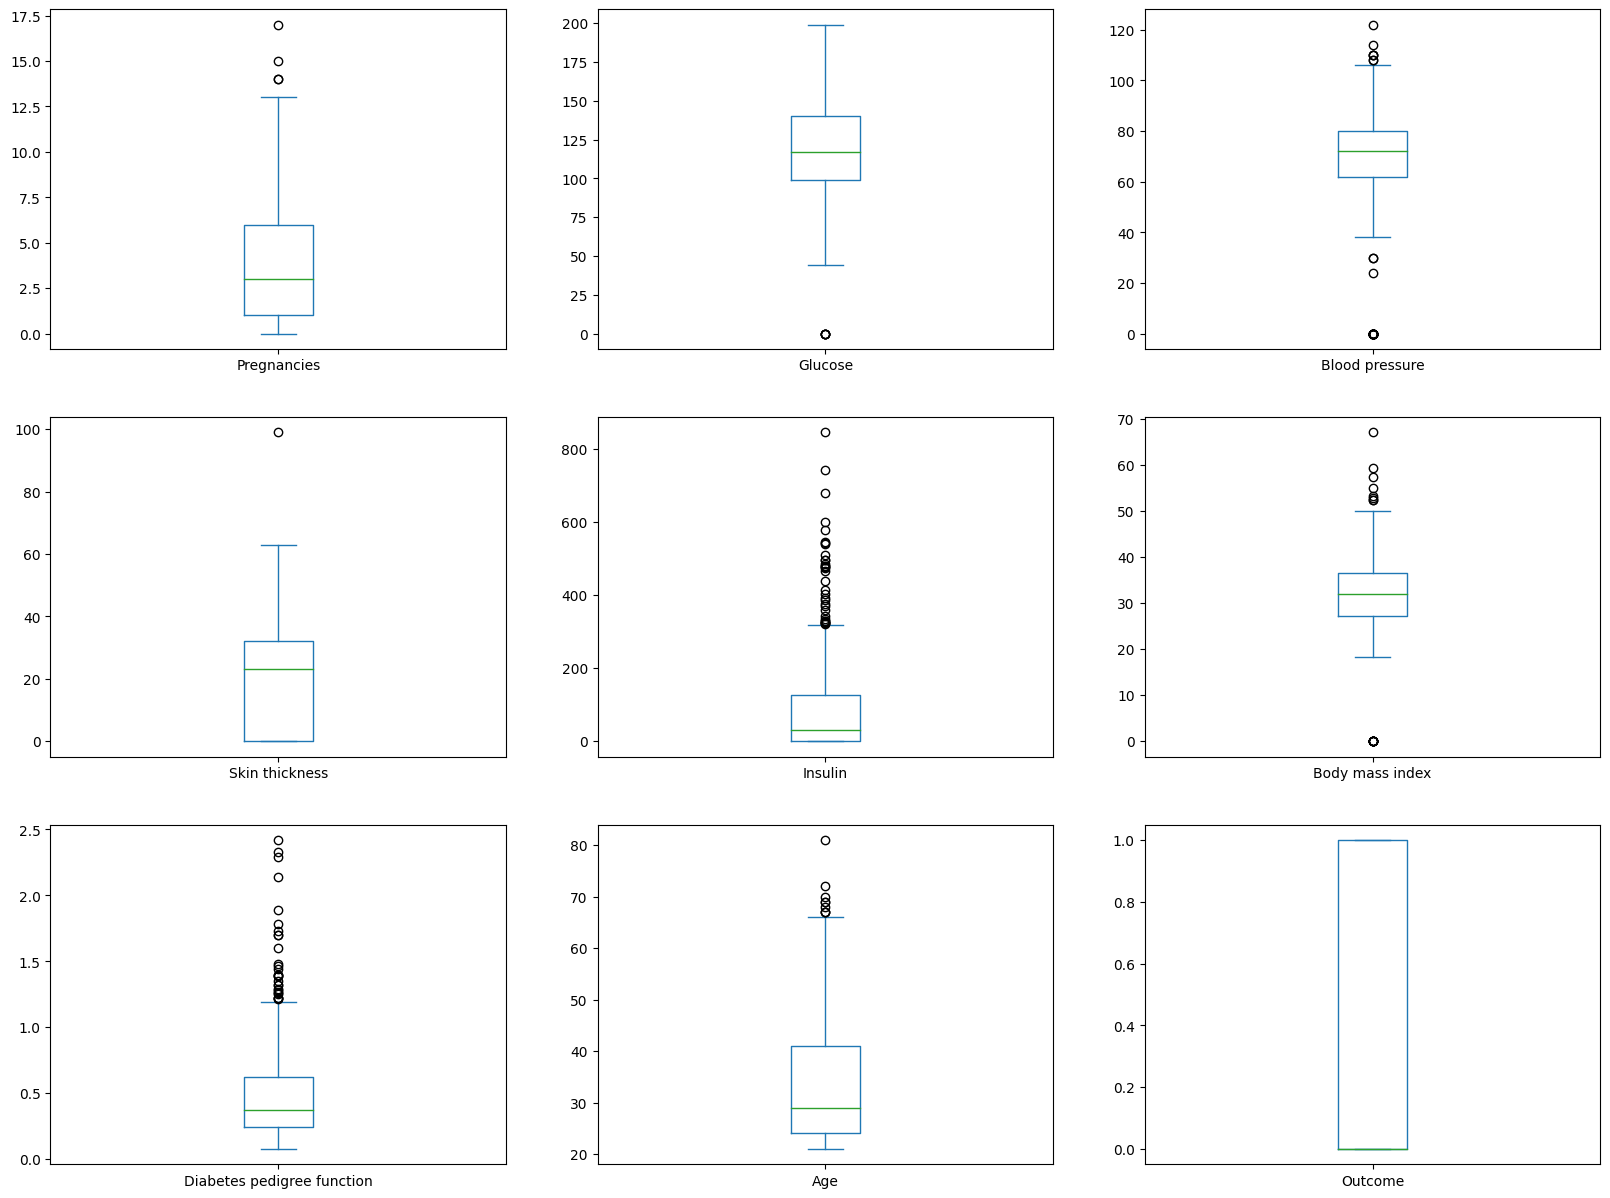

In [ ]:
#Box and Whisker plot to visualize the distribution of all atributes for outliers
diabetesdf.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [ ]:
# Calculate the number of zeros in each column
num_zeros = (diabetesdf == 0).sum()

# Print the number of zeros in each column
print(num_zeros)

Pregnancies                   111
Glucose                         5
Blood pressure                 35
Skin thickness                227
Insulin                       374
Body mass index                11
Diabetes pedigree function      0
Age                             0
Outcome                       500
dtype: int64


In [ ]:
#check missing values
diabetesdf.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood pressure                0
Skin thickness                0
Insulin                       0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Outcome                       0
dtype: int64

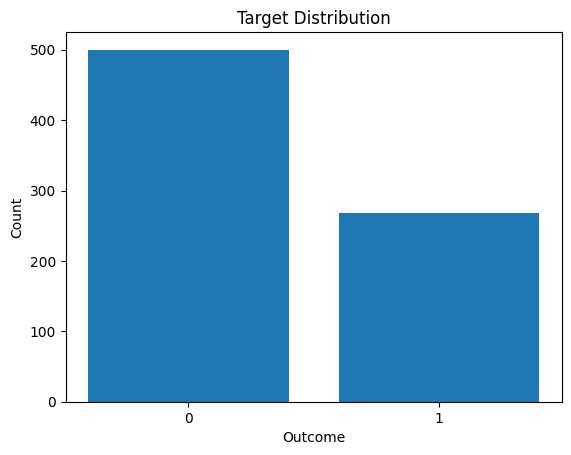

In [ ]:
# Create bar chart for target column
counts = diabetesdf['Outcome'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks([0, 1])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()


In [ ]:
# Print the number of zeros in each column
num_zeros = (diabetesdf == 0).sum()
print(num_zeros)

Pregnancies                   111
Glucose                         5
Blood pressure                 35
Skin thickness                227
Insulin                       374
Body mass index                11
Diabetes pedigree function      0
Age                             0
Outcome                       500
dtype: int64


In [ ]:
# Create a list of column names where you want to replace 0 with NaN and fill NaN with mean
cols_to_convert = ['Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index',]

# Replace 0 values with NaN in selected columns
diabetesdf[cols_to_convert] = diabetesdf[cols_to_convert].replace(0, np.nan)

# Replace NaN values with mean of column in selected columns
diabetesdf[cols_to_convert] = diabetesdf[cols_to_convert].fillna(diabetesdf[cols_to_convert].mean())

Pregnancies                      Axes(0.125,0.653529;0.227941x0.226471)
Glucose                       Axes(0.398529,0.653529;0.227941x0.226471)
Blood pressure                Axes(0.672059,0.653529;0.227941x0.226471)
Skin thickness                   Axes(0.125,0.381765;0.227941x0.226471)
Insulin                       Axes(0.398529,0.381765;0.227941x0.226471)
Body mass index               Axes(0.672059,0.381765;0.227941x0.226471)
Diabetes pedigree function           Axes(0.125,0.11;0.227941x0.226471)
Age                               Axes(0.398529,0.11;0.227941x0.226471)
Outcome                           Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

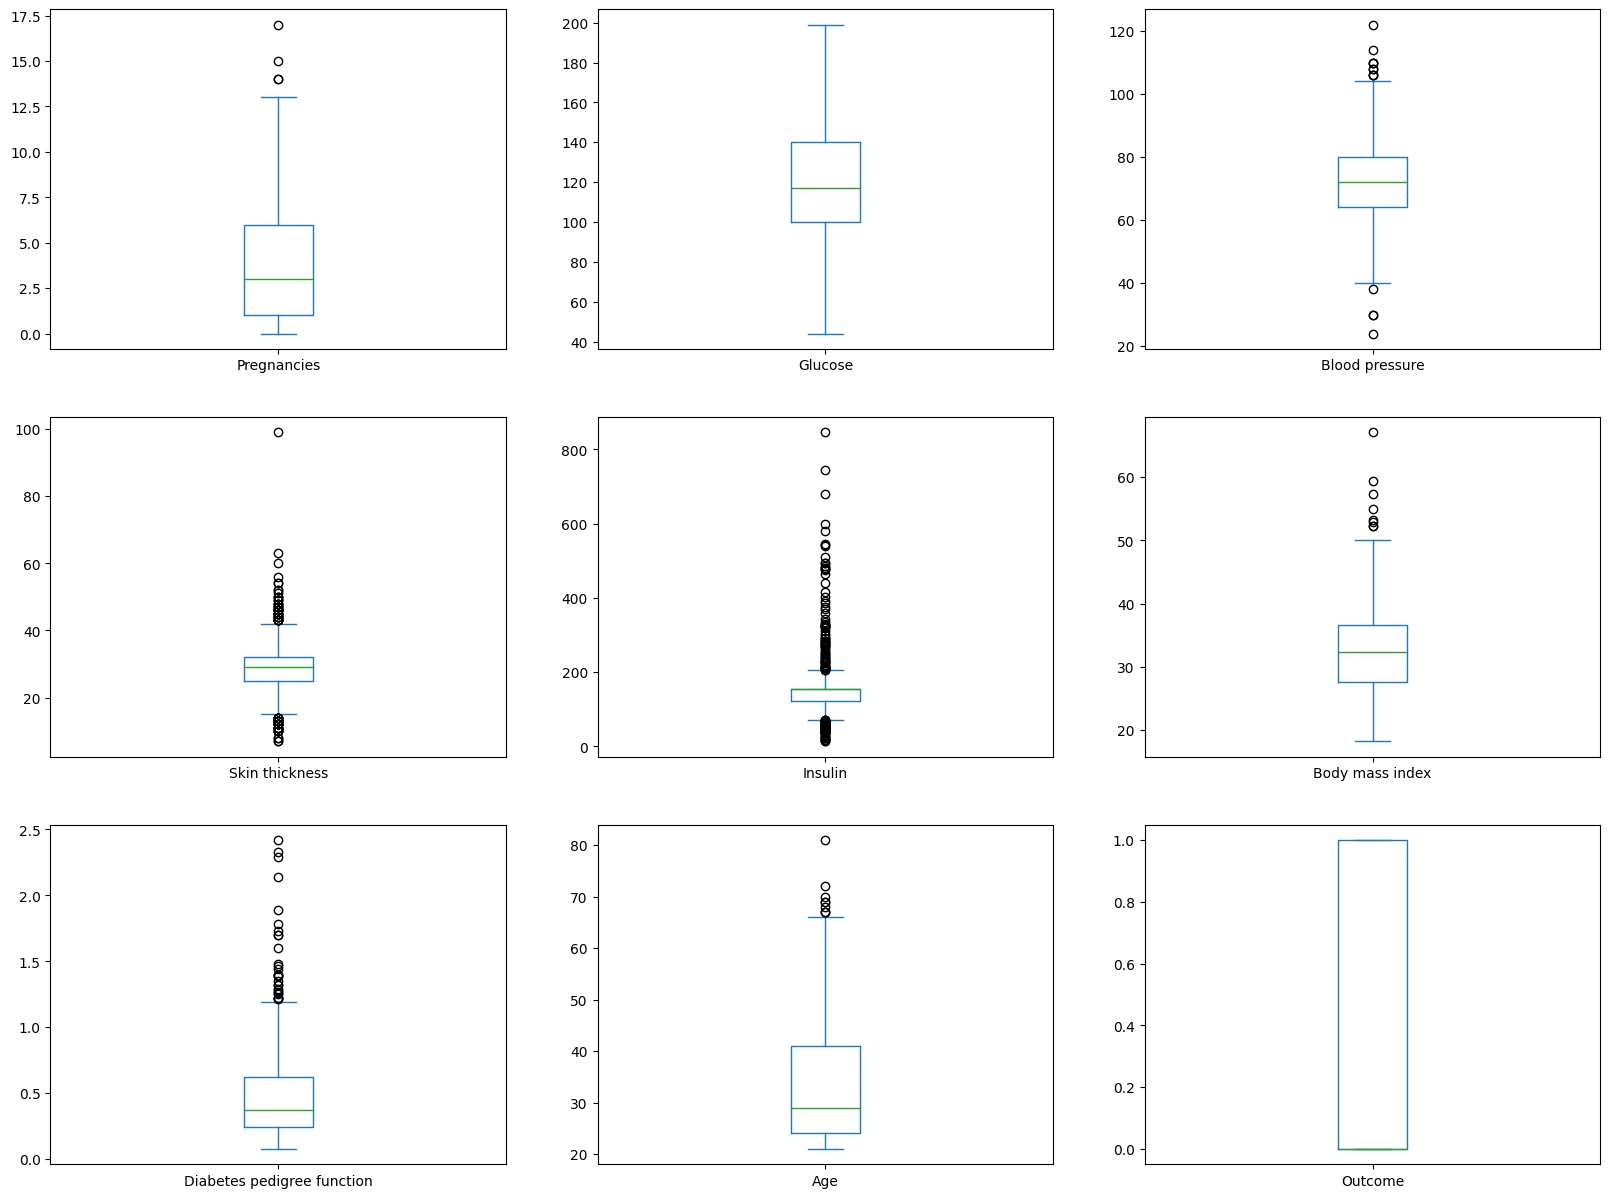

In [ ]:
#Box and Whisker plot to visualize the distribution of all atributes for outliers
diabetesdf.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

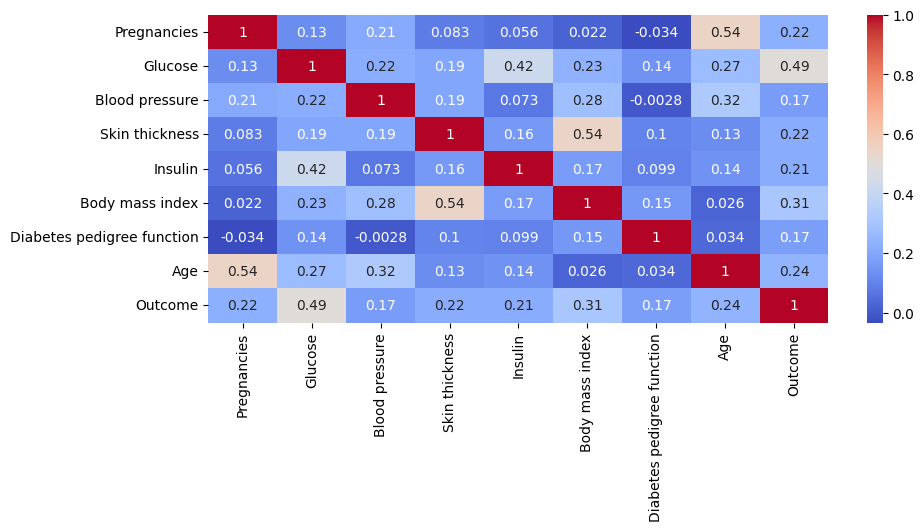

In [ ]:
# Perform correlation analysis and print the heatmap
#corr = diabetesdf.corr()
#sns.heatmap(corr, annot=True, cmap="coolwarm")

# Select the 8 features for analysis
features = ['Pregnancies', 'Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index', 'Diabetes pedigree function', 'Age', 'Outcome']

# calculate the correlation matrix
corr_matrix = diabetesdf[features].corr(method='pearson')

# plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 4)) # set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax) # plot the heatmap
plt.show() # show the plot

In [ ]:
# Specify the columns to replace outliers in
cols = ['Pregnancies','Glucose','Skin thickness','Insulin','Body mass index','Age']

# Replace outliers in the columns with the median value
for col in cols:
    q1 = diabetesdf[col].quantile(0.25)
    q3 = diabetesdf[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    median = diabetesdf[col].mean()
    diabetesdf[col] = np.where(diabetesdf[col] < lower_bound, median, diabetesdf[col])
    diabetesdf[col] = np.where(diabetesdf[col] > upper_bound, median, diabetesdf[col])

In [ ]:
# Split the dataset into features (X) and target (y)
X = diabetesdf[['Pregnancies','Glucose','Body mass index','Age']]
y = diabetesdf['Outcome']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Class weight for handling class imbalance

In [ ]:
# Calculate the class weights for imbalanced target
class_weights = dict(zip([0, 1], [(len(y_train)-sum(y_train))/len(y_train), sum(y_train)/len(y_train)]))

# create an SVM classifier with class weights
clf = SVC(kernel='linear', class_weight=class_weights)

# train the classifier on the training data
clf.fit(X_train, y_train)

# predict labels for the test data
y_pred_svm = clf.predict(X_test)

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred_svm)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, y_pred_svm)*100)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

79.22077922077922
[[101   6]
 [ 26  21]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       107
           1       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154



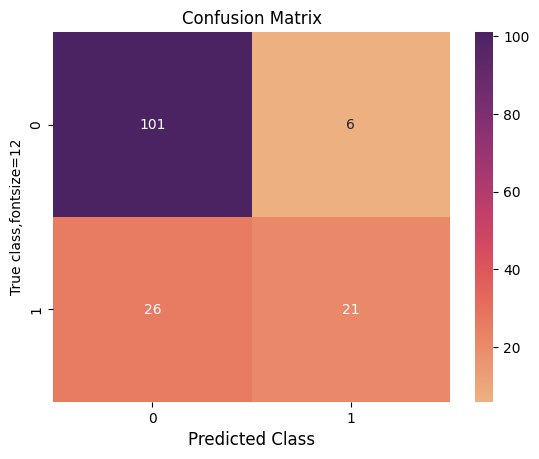

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
# XGBoost with class weight
xgb_model = XGBClassifier(scale_pos_weight=class_weights[0]/class_weights[1])
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

cm=metrics.confusion_matrix(y_test,y_pred_xgb)
print(metrics.accuracy_score(y_test, y_pred_xgb)*100)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

77.92207792207793
[[86 21]
 [13 34]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       107
           1       0.62      0.72      0.67        47

    accuracy                           0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154



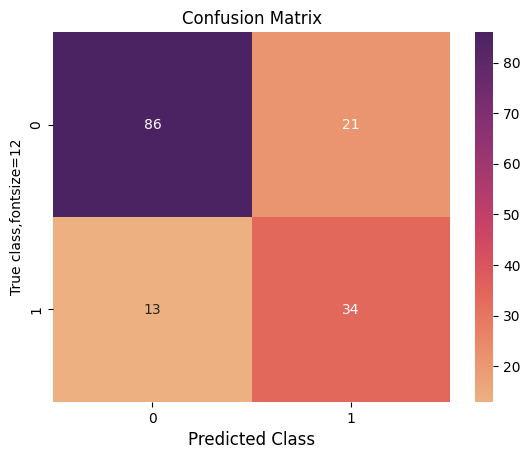

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
# Decision tree with class weight
dt_model = DecisionTreeClassifier(class_weight=class_weights)
dt_model.fit(X_train, y_train)

#Make predictions on the test set using Decision tree models
y_pred_dc= dt_model.predict(X_test)

#Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dc)

cm=metrics.confusion_matrix(y_test,y_pred_dc)
print(metrics.accuracy_score(y_test, y_pred_dc)*100)
print(confusion_matrix(y_test, y_pred_dc))
print(classification_report(y_test, y_pred_dc))

76.62337662337663
[[88 19]
 [17 30]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



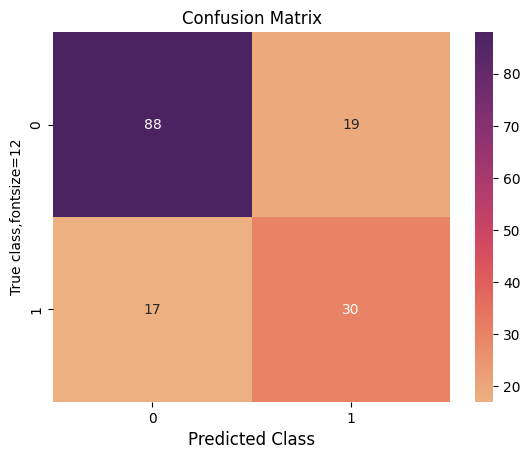

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

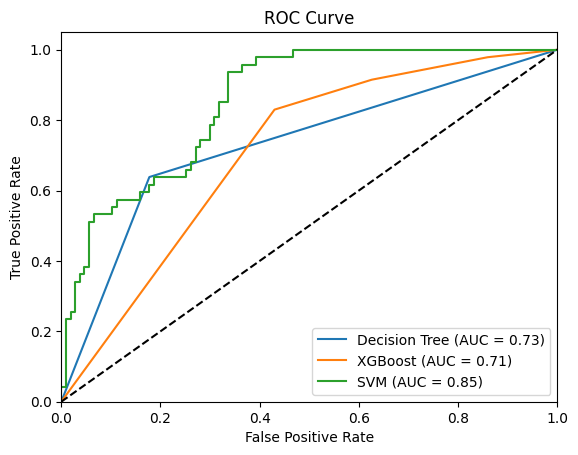

In [ ]:
# Get the predicted probabilities for each model
y_pred_dt = dt_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_svm = clf.decision_function(X_test)

# Calculate the false positive rate, true positive rate, and AUC for each model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
auc_dt = auc(fpr_dt, tpr_dt)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curves for each model
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

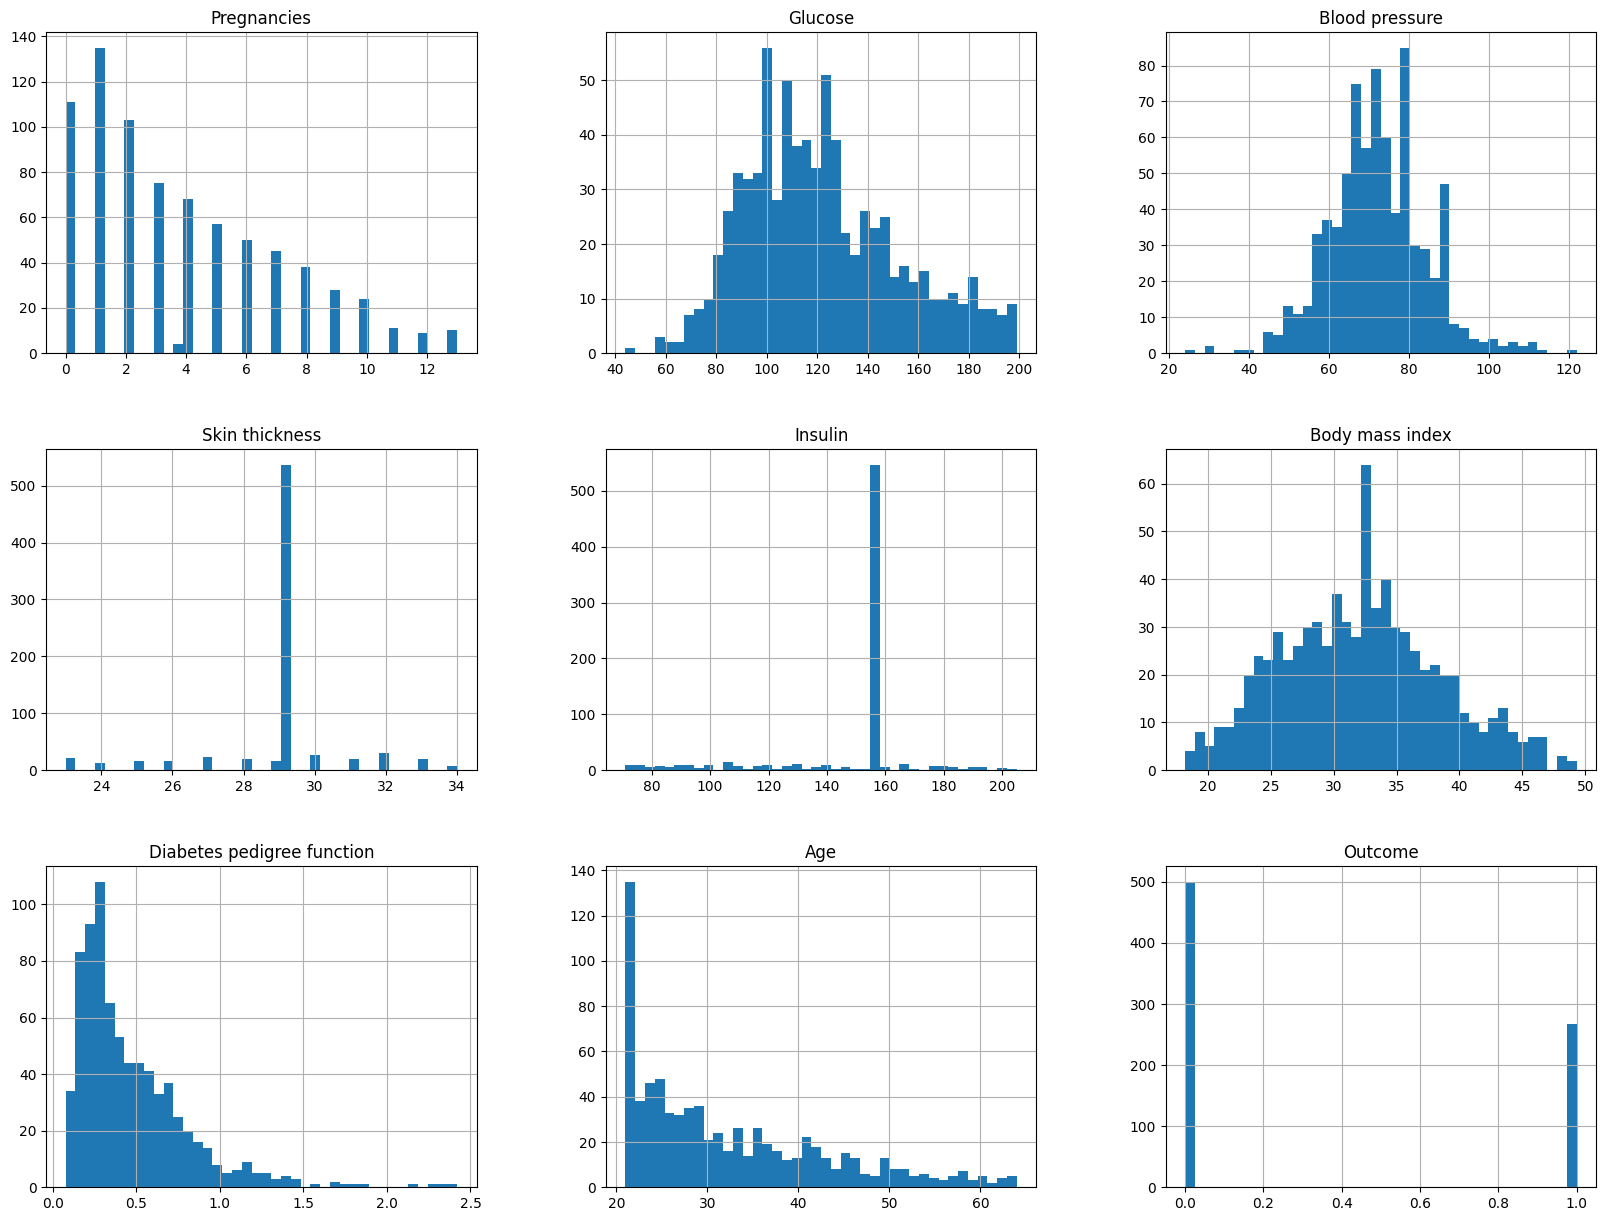

In [ ]:
# Specify the columns to replace outliers in
cols = ['Pregnancies','Glucose','Skin thickness','Body mass index','Age']

# Replace outliers in the columns with the median value
for col in cols:
    q1 = diabetesdf[col].quantile(0.25)
    q3 = diabetesdf[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    median = diabetesdf[col].median()
    diabetesdf[col] = np.where(diabetesdf[col] < lower_bound, median, diabetesdf[col])
    diabetesdf[col] = np.where(diabetesdf[col] > upper_bound, median, diabetesdf[col])

#Attribute distribution
diabetesdf.hist(bins=40,figsize=(20,15))
plt.show()

#Smote oversampling for imbalanced data

In [ ]:
# Apply SMOTE oversampling to balance the class distribution
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an SVM classifier
clf = SVC(kernel='linear')

# train the classifier on the training data
clf.fit(X_train, y_train)

# predict labels for the test data
y_pred_svm = clf.predict(X_test)

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred_svm)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, y_pred_svm)*100)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

76.0
[[83 22]
 [26 69]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       105
           1       0.76      0.73      0.74        95

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



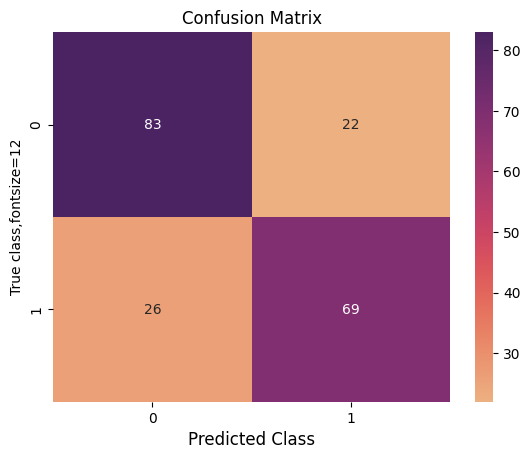

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
# Fit random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [ ]:
cm=metrics.confusion_matrix(y_test,rf_y_pred)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, rf_y_pred)*100)
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

86.0
[[84 21]
 [ 7 88]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       105
           1       0.81      0.93      0.86        95

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



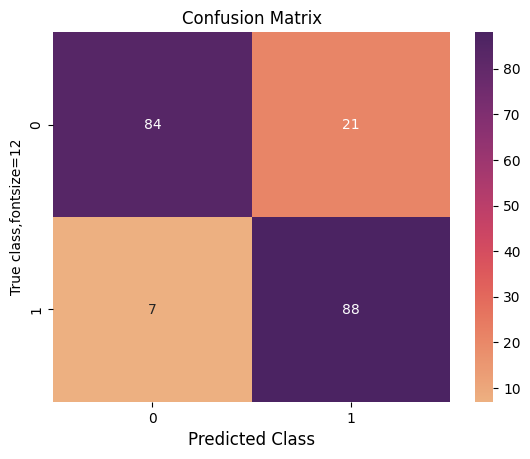

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
# Fit decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

In [ ]:
cm=metrics.confusion_matrix(y_test,dt_y_pred)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, dt_y_pred)*100)
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

78.0
[[80 25]
 [19 76]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       105
           1       0.75      0.80      0.78        95

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



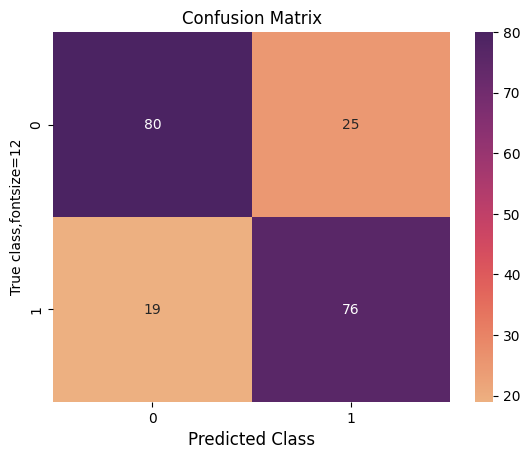

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
xgb= XGBClassifier(n_estimators=50, random_state=0)
xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb.predict(X_test_scaled)

# Calculate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred_xgb)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, y_pred_xgb)*100)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

88.5
[[88 17]
 [ 6 89]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       105
           1       0.84      0.94      0.89        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



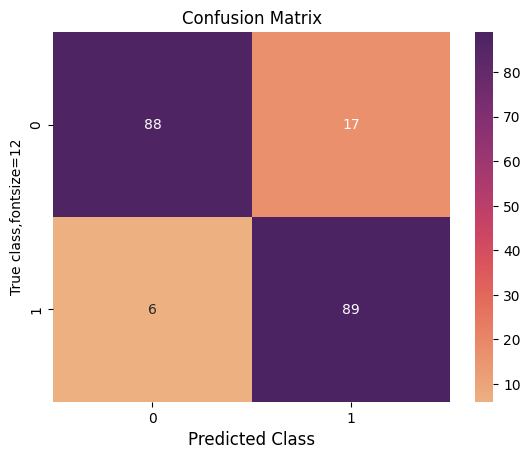

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
!pip install lime
import lime.lime_tabular
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=d87d223b3316650d63b6c6a2de9c1f58499e8e3a390b3556d0a5a3715ab127e3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.0 MB/s eta 0:00:00


In [ ]:
# Define the Lime explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])

# Explain a random test example using Lime
test_instance = X_test.values[0]
exp = lime_explainer.explain_instance(test_instance, .predict_proba, num_features=4)
exp.show_in_notebook(show_table=True)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
import shap
shap.initjs()

# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values for all features in the test set
shap_values = explainer.shap_values(X_test)

# Convert the feature names to a list of strings
feature_names = list(X_test.columns)

# Plot the SHAP force plot for the first sample in the test set
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0,:], feature_names=feature_names)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
# Load the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Define a function to calculate the probability of diabetes for a given user input
def calculate_diabetes_probability(pregnancies, glucose, bmi, age):
    # Create a pandas DataFrame with the user input
    user_input = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'Body mass index': [bmi],
        'Age': [age]
    })

    # Convert zeros to NaN in the "glucose" column
    user_input.loc[user_input['Glucose'] == 0, 'Glucose'] = np.nan

    # Fill NaN values with the median of the "glucose" column
    user_input['Glucose'].fillna(user_input['Glucose'].median(), inplace=True)

     # Convert zeros to NaN in the "glucose" column
    user_input.loc[user_input['Body mass index'] == 0, 'Body mass index'] = np.nan

    # Fill NaN values with the median of the "glucose" column
    user_input['Body mass index'].fillna(user_input['Body mass index'].median(), inplace=True)

    # Convert zeros to NaN in the "glucose" column
    user_input.loc[user_input['Age'] == 0, 'Age'] = np.nan

    # Fill NaN values with the median of the "glucose" column
    user_input['Age'].fillna(user_input['Age'].median(), inplace=True)

    # Calculate the SHAP values for the user input
    shap_values = explainer.shap_values(user_input)

    # Calculate the base value for the model
    base_value = explainer.expected_value

    # Calculate the contribution of each feature to the prediction for the user input
    feature_contributions = shap_values.sum() + base_value

    # Calculate the probability of diabetes as the sigmoid of the sum of the feature contributions
    diabetes_probability = 1 / (1 + np.exp(-feature_contributions))

    return diabetes_probability

# Get user input for age, BMI, and glucose
pregnancies = float(input('Enter number of pregnancies: '))
glucose = float(input('Enter your glucose level: '))
bmi = float(input('Enter your BMI: '))
age = int(input('Enter your age: '))

# Calculate the probability of diabetes for the user input
diabetes_probability = calculate_diabetes_probability(pregnancies, glucose, bmi, age)

# Print the probability as a percentage
print('The probability of the patient having diabetes is {:.2f}%'.format(diabetes_probability * 100))

Enter number of pregnancies: 3
Enter your glucose level: 130
Enter your BMI: 18.5
Enter your age: 31
The probability of the patient having diabetes is 85.52%


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


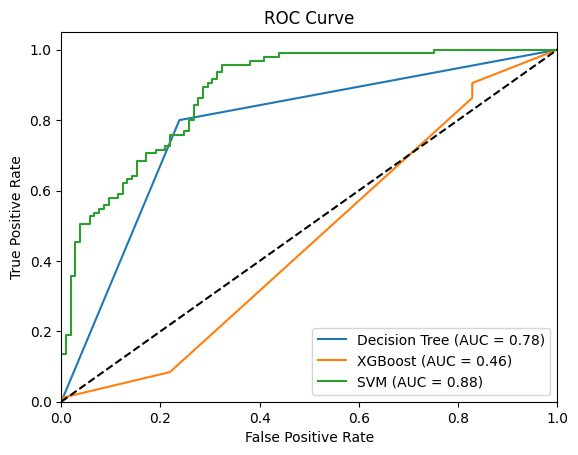

In [ ]:
# Get the predicted probabilities for each model
y_pred_dt = dt.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_svm = clf.decision_function(X_test)

# Calculate the false positive rate, true positive rate, and AUC for each model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
auc_dt = auc(fpr_dt, tpr_dt)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curves for each model
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for each model
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_dt)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_svm)

# Plot the precision-recall curves for each model
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()